# Netflix Dataset Analysis

## Introduction:
This Dataset contains the information about the shows released on netflix. It contains all the data related to shows i.e. country, genres, cast, irector, duration, rating and etc. The objective is to analuze this dataset and extract useful and meaningful insights from it. 

## 1. Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [6]:
df= pd.read_csv("C:/Users/DELL/Downloads/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 3. Explore Data

In [8]:
print("Shape: ", df.shape)
print("Columns: ", df.columns)
df.info()

Shape:  (8807, 12)
Columns:  Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 4. Null Values

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Data Overview:
- Dataset size: rows=8807, columns=12
- Missing values: director=2634, cast=825, country= 831, date_added=10, rating=4, duration=3

## 5. Clean the Data

In [13]:
df['country']=df['country'].fillna('Unknown') #for country analysis

In [14]:
# Step 1: Strip leading/trailing spaces from all date strings
#df['date_added']=df['date_added'].astype(str).str.strip()
# Step 2: Now convert to datetime
#df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')

#we can also drop the rows with null values in "date_added_ column as they are low in number i.e. only 10, which will not affect our analysis that much
df.dropna(subset=['date_added'], inplace=True)

In [15]:
df['rating']=df['rating'].fillna('Unknown')
df['duration']=df['duration'].fillna('Unknown')
#these fields can later be used for filtering or grouping

In [23]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added']=df['date_added'].dt.year 
#this column will be used for time trends

In [25]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country            0
date_added        88
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added        88
dtype: int64

## 6. EDA + Visualization

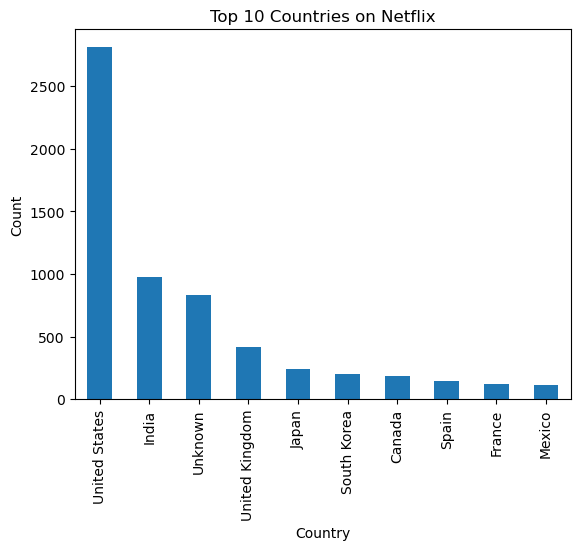

In [28]:
#1. Top 10 countries with most content
df['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Countries on Netflix')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

#### ***Insight:*** USA has most content followed by India 

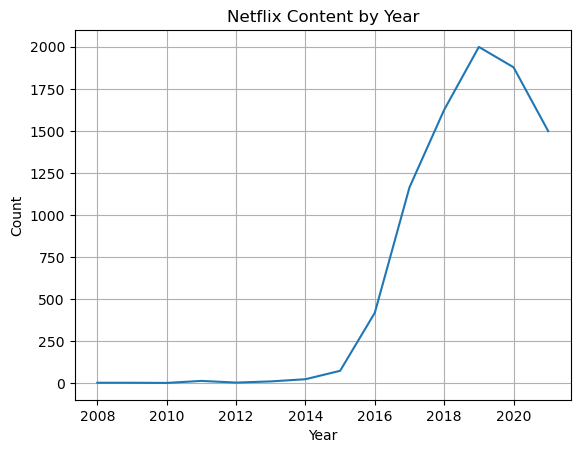

In [31]:
#2. Content Added by Year
df['year_added'].value_counts().sort_index().plot(kind='line', title='Netflix Content by Year')
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid()
plt.show()

#### ***Insight:*** Most of the content was added in year 2019 i.e. COVID-19 year but on the yaer 2020 the content had a decline due to lockdowns all over the world.

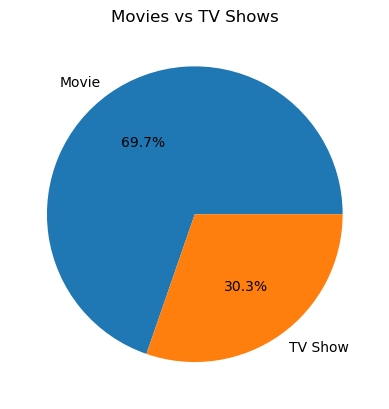

In [34]:
#Movie vs TV Show
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Movies vs TV Shows')
plt.ylabel('')
plt.show()

#### ***Insight:*** 69.7% of the netflix audience watches movies while the rest 30.3% is the audience of TV shows

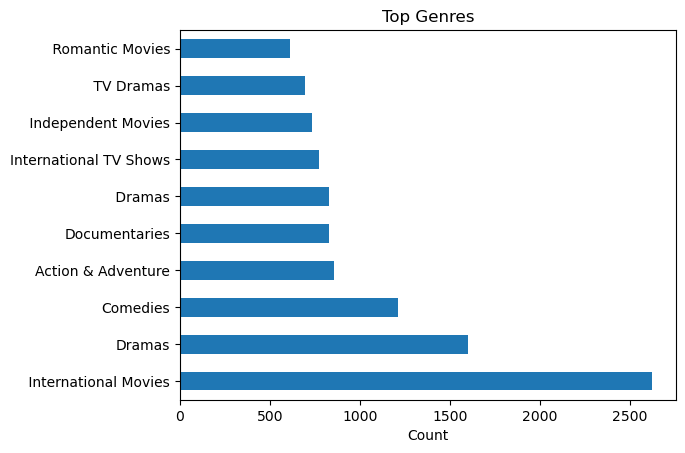

In [37]:
#3. Most Popular Genres
df['listed_in'].str.split(',', expand=True).stack().value_counts().head(10).plot(kind='barh', title='Top Genres')
plt.xlabel("Count")
plt.show()

#### ***Insight***: Most popular Genres include International Movies followed by Dramas and Comedy.

## 🔍 Summary of Findings

- Most content is from USA and India
- 2019 had the highest content addition
- International Movies, Dramas, and Comedies dominate Netflix
- Movies make up ~70% of Netflix content

## 💡 Business Suggestion

Netflix can:
- Invest more in regional content (e.g., Korean, Turkish)
- Increase TV shows in trending genres
- Explore underrepresented countries
